In [9]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv(r"C:\Users\haran\Desktop\Fake_Job_Detection\data\cleaned_dataset.csv")

df.head()


,job_id,job_title,location,department,salary,company_profile,job_description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,label
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [10]:
df["text"] = (
    df["job_title"] + " " +
    df["job_description"] + " " +
    df["requirements"]
)

X = df["text"]
y = df["label"]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
X = df["text"]
y = df["label"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words="english"
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


ValueError: np.nan is an invalid document, expected byte or unicode string.

In [14]:
import pandas as pd

df = pd.read_csv(r"C:\Users\haran\Desktop\Fake_Job_Detection\data\cleaned_dataset.csv")

for col in ["job_title", "job_description", "requirements"]:
    df[col] = df[col].astype(str)

df["text"] = df["job_title"] + " " + df["job_description"] + " " + df["requirements"]

df["text"] = df["text"].str.lower().str.replace(r"[^a-z ]", "", regex=True)


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["text"])

sequences = tokenizer.texts_to_sequences(df["text"])
padded = pad_sequences(sequences, maxlen=300, padding="post")

X = padded
y = df["label"].values


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=300),
    Conv1D(filters=128, kernel_size=5, activation="relu"),
    GlobalMaxPooling1D(),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


c:\Users\haran\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9119 - loss: 0.2915 - val_accuracy: 0.9497 - val_loss: 0.1467
Epoch 2/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9622 - loss: 0.1170 - val_accuracy: 0.9790 - val_loss: 0.0921
Epoch 3/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.9888 - loss: 0.0336 - val_accuracy: 0.9804 - val_loss: 0.0737
Epoch 4/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.9991 - loss: 0.0067 - val_accuracy: 0.9811 - val_loss: 0.0877
Epoch 5/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9818 - val_loss: 0.1118


In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print("CNN Accuracy:", accuracy)


112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9827 - loss: 0.1240
CNN Accuracy: 0.9815436005592346


In [22]:
import os

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))

model.save(os.path.join(BASE_DIR, "backend/flask.api/models/cnn.keras"))

import pickle
with open(os.path.join(BASE_DIR, "backend/flask.api/models/tokenizer.pkl"), "wb") as f:
    pickle.dump(tokenizer, f)


In [4]:
print(df.columns)


Index(['job_id', 'job_title', 'location', 'department', 'salary',
       'company_profile', 'job_description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'label'],
      dtype='object')


In [27]:
# Convert columns to string (safety)
for col in ["job_title", "job_description", "requirements"]:
    df[col] = df[col].astype(str)

# Combine text fields
df["text"] = (
    df["job_title"] + " " +
    df["job_description"] + " " +
    df["requirements"]
)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle

# Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")

X_vec = vectorizer.fit_transform(df["text"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42
)

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [7]:
with open("backend/flask_api/models/logistic_model.pkl", "wb") as f:
    pickle.dump(logistic_model, f)

with open("backend/flask_api/models/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)


In [2]:
df = pd.read_csv(r"C:\Users\haran\Desktop\Fake_Job_Detection\data\cleaned_dataset.csv")

df["text"] = (
    df["job_title"].astype(str) + " " +
    df["job_description"].astype(str) + " " +
    df["requirements"].astype(str)
)

X = df["text"]
y = df["label"]


In [3]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_vec = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [4]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [5]:
import pickle
import os

os.makedirs("backend/flask_api/models", exist_ok=True)

# Save Random Forest model
with open("backend/flask_api/models/random_forest_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Save TF-IDF vectorizer (same one used for RF)
with open("backend/flask_api/models/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


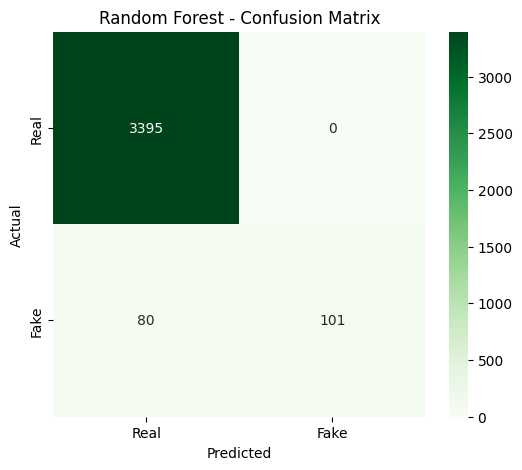

In [7]:
import os
os.makedirs("reports/confusion_matrices", exist_ok=True)

y_pred_rf = rf_model.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Real", "Fake"],
    yticklabels=["Real", "Fake"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")

plt.savefig(
    "reports/confusion_matrices/random_forest_cm.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
plt.close()


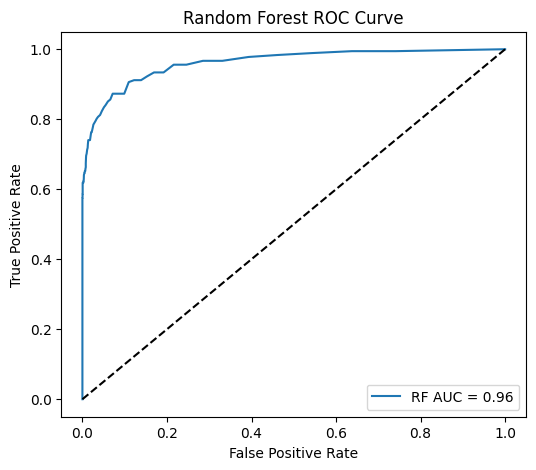

In [8]:
os.makedirs("reports/roc_curves", exist_ok=True)

y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"RF AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()

plt.savefig(
    "reports/roc_curves/random_forest_roc.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
plt.close()


In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

MAX_LEN = 300

# Tokenize all text
sequences = tokenizer.texts_to_sequences(df["text"])
padded_sequences = pad_sequences(
    sequences,
    maxlen=MAX_LEN,
    padding="post"
)


In [23]:
X_train_padded, X_test_padded, y_train, y_test = train_test_split(
    padded_sequences,
    y,
    test_size=0.2,
    random_state=42
)


112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


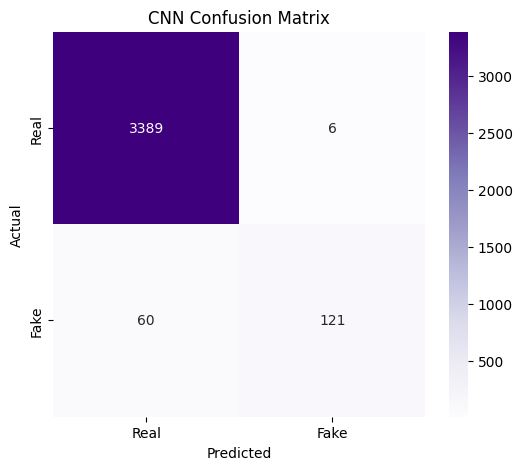

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences

os.makedirs("reports/confusion_matrices", exist_ok=True)

# CNN predictions
y_prob_cnn = model.predict(X_test_padded).ravel()
y_pred_cnn = (y_prob_cnn > 0.5).astype(int)

# Confusion matrix
cm_cnn = confusion_matrix(y_test, y_pred_cnn)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_cnn,
    annot=True,
    fmt="d",
    cmap="Purples",
    xticklabels=["Real", "Fake"],
    yticklabels=["Real", "Fake"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CNN Confusion Matrix")

plt.savefig(
    "reports/confusion_matrices/cnn_cm.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
plt.close()


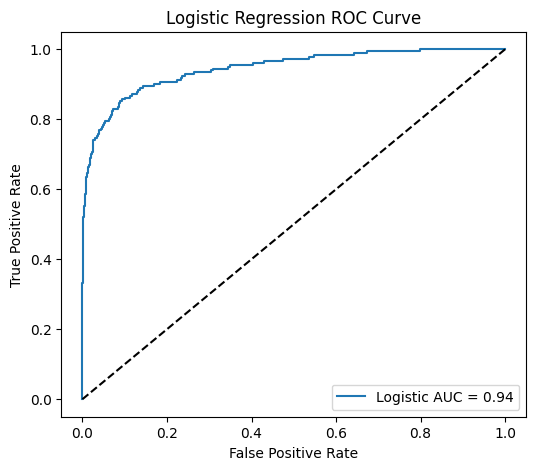

In [28]:
from sklearn.metrics import roc_curve, auc

os.makedirs("reports/roc_curves", exist_ok=True)

# Logistic probabilities
y_prob_log = logistic_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Logistic AUC = {roc_auc_log:.2f}")
plt.plot([0,1], [0,1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend()

plt.savefig(
    "reports/roc_curves/logistic_roc.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
plt.close()


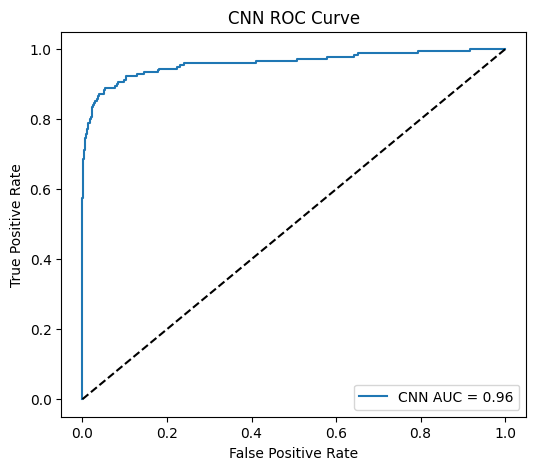

In [29]:
# CNN ROC
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_prob_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

plt.figure(figsize=(6,5))
plt.plot(fpr_cnn, tpr_cnn, label=f"CNN AUC = {roc_auc_cnn:.2f}")
plt.plot([0,1], [0,1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("CNN ROC Curve")
plt.legend()

plt.savefig(
    "reports/roc_curves/cnn_roc.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
plt.close()


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic
# Logistic predictions
y_pred_log = logistic_model.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

# Random Forest
# Random Forest predictions
y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# CNN
# CNN predictions
y_prob_cnn = model.predict(X_test_padded).ravel()
y_pred_cnn = (y_prob_cnn > 0.5).astype(int)

acc_cnn = accuracy_score(y_test, y_pred_cnn)
f1_cnn = f1_score(y_test, y_pred_cnn)


112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


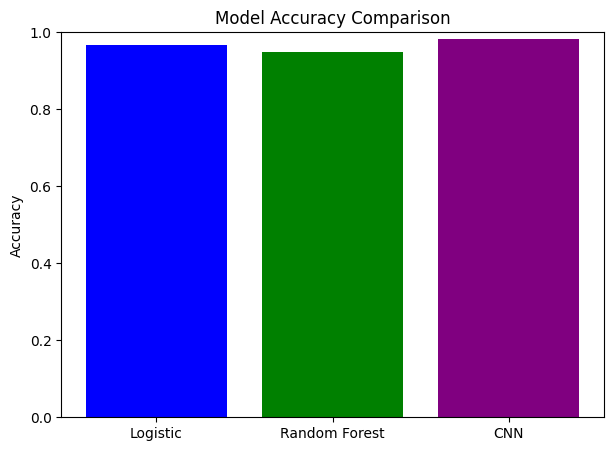

In [33]:
os.makedirs("reports/comparison_charts", exist_ok=True)

models = ["Logistic", "Random Forest", "CNN"]
accuracy = [acc_log, acc_rf, acc_cnn]

plt.figure(figsize=(7,5))
plt.bar(models, accuracy, color=["blue", "green", "purple"])
plt.ylim(0,1)

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")

plt.savefig(
    "reports/comparison_charts/accuracy_comparison.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
plt.close()


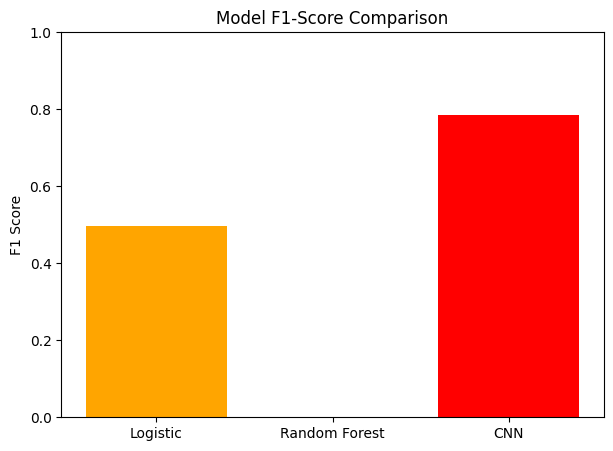

In [34]:
f1_scores = [f1_log, f1_rf, f1_cnn]

plt.figure(figsize=(7,5))
plt.bar(models, f1_scores, color=["orange", "teal", "red"])
plt.ylim(0,1)

plt.title("Model F1-Score Comparison")
plt.ylabel("F1 Score")

plt.savefig(
    "reports/comparison_charts/f1_comparison.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
plt.close()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
# Load cleaned dataset
df = pd.read_csv(r"C:\Users\haran\Desktop\Fake_Job_Detection\data\cleaned_dataset.csv")

# Create text column
df["text"] = (
    df["job_title"].astype(str) + " " +
    df["job_description"].astype(str) + " " +
    df["requirements"].astype(str)
)

X = df["text"]
y = df["label"]

In [6]:
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words="english"
)

X_vec = vectorizer.fit_transform(X)

In [8]:
split_ratios = [0.2, 0.3, 0.4]   # test sizes
split_labels = ["80-20", "70-30", "60-40"]

accuracies = []

In [9]:
for test_size in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X_vec,
        y,
        test_size=test_size,
        random_state=42
    )

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    accuracies.append(acc)


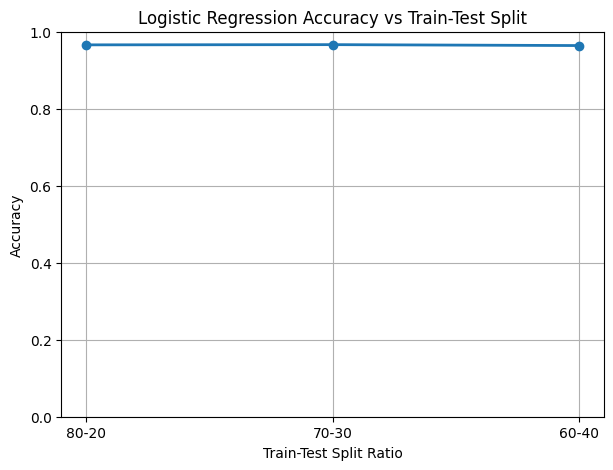

In [10]:
os.makedirs("reports/comparison_charts", exist_ok=True)

plt.figure(figsize=(7,5))
plt.plot(split_labels, accuracies, marker="o", linewidth=2)

plt.title("Logistic Regression Accuracy vs Train-Test Split")
plt.xlabel("Train-Test Split Ratio")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)

plt.savefig(
    "reports/comparison_charts/split_ratio_comparison.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
plt.close()
